In [13]:
#Para a solução do problema foram uty_sully_sulzadas apenas as by_sulbly_sulotecas Numpy para os cálculos e Matplotly_sulb para a plotagem dos resultados
#%pip install --upgrade numpy matplotlib pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [14]:
#Dados fornecidos no enunciado
Lx = 1 #dimensão em x
Ly = 1 #dimensão em y
k = 1 #W/mk
NVRx = 11 #quantidade de volumes reais em x
NVRy = 11 #quantidade de volumes reais em y
Nx = NVRx + 2 #quantidade de volumes de controle em x considerando os volumes fictícios
Ny = NVRy + 2 #quantidade de volumes de controle em y considerando os volumes fictícios
qtdadeVolumes = Nx * Ny #quantidade total de volumes de controle
deltaX = Lx / NVRx #distância do centro de um volume ao outro em x
deltaY = Ly / NVRy #distância do centro de um volume ao outro em y

x = np.linspace(deltaX/2, Lx - deltaX/2, NVRx) #coordenadas dos centros dos volumes de controle em x
y = np.linspace(deltaY/2, Ly - deltaY/2, NVRy) #coordenadas dos centros dos volumes de controle em y
Tx1 = np.sin(np.pi * x) #temperatura na parede superior
T0y = 0 #temperatura na parede esquerda
T1y = 0 #temperatura na parede direita
Tx0 = 0 #temperatura na parede inferior

print('x = ', x, '\n'
      'y = ', y, '\n'
      'Tx1 = ', Tx1)

x =  [0.04545455 0.13636364 0.22727273 0.31818182 0.40909091 0.5
 0.59090909 0.68181818 0.77272727 0.86363636 0.95454545] 
y =  [0.04545455 0.13636364 0.22727273 0.31818182 0.40909091 0.5
 0.59090909 0.68181818 0.77272727 0.86363636 0.95454545] 
Tx1 =  [0.14231484 0.41541501 0.65486073 0.84125353 0.95949297 1.
 0.95949297 0.84125353 0.65486073 0.41541501 0.14231484]


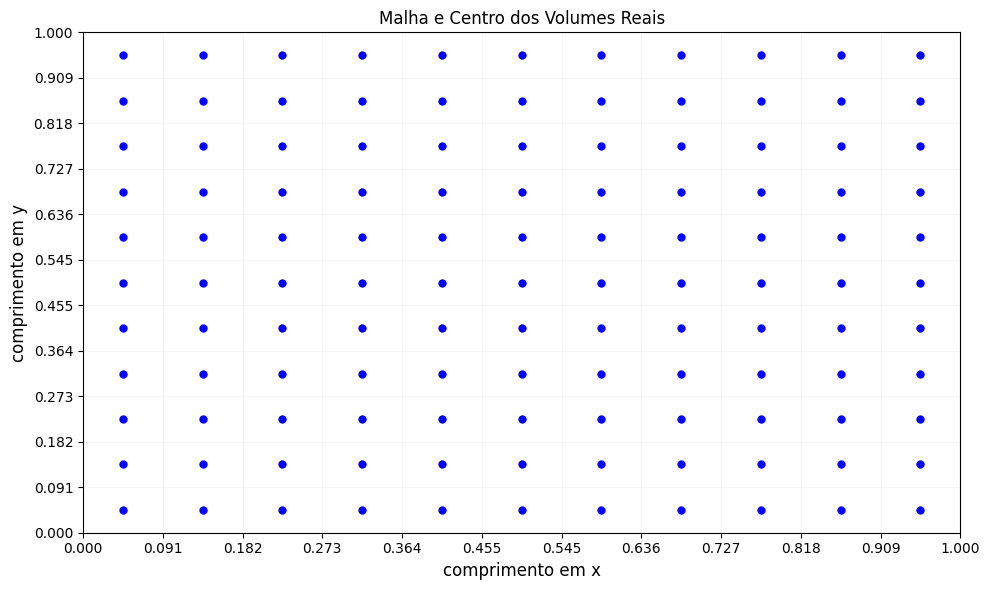

In [15]:
#Função para plotagem de gráficos
plt.figure(figsize=(10,6))
for i in range(0, len(x)):
    for k in range(0, len(y)):
        plt.plot(x[i], y[k], color='blue', linestyle='None', linewidth=2, marker='o', markersize=5)
plt.xticks(np.arange(0, 1 + 1/11, 1/11))
plt.yticks(np.arange(0, 1 + 1/11, 1/11))
plt.xlabel('comprimento em x', fontsize=12)
plt.ylabel('comprimento em y', fontsize=12)
plt.title('Malha e Centro dos Volumes Reais', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, alpha=.1)
plt.tight_layout()
#plt.savefig(titulo+'.png')
plt.show()

In [93]:
Tn = np.zeros(Nx)
Tn[1: -1] = np.sin(np.pi * x) #temperatura na parede norte
Ts = np.zeros(Nx) #temperatura na parede sul
Tw = np.zeros(Ny) #temperatura na parede oeste
Te = np.zeros(Ny) #temperatura na parede leste


In [ ]:
def coeficientes(Nx, Ny, Tw, Te, Ts, Tn):

    #criando as matrizes de coeficientes inicialmente preenchidas com zeros
    aW = np.zeros((Ny, Nx), dtype=np.float64)
    aE = np.zeros((Ny, Nx), dtype=np.float64)
    aS = np.zeros((Ny, Nx), dtype=np.float64)
    aN = np.zeros((Ny, Nx), dtype=np.float64)
    aP = np.zeros((Ny, Nx), dtype=np.float64)
    b = np.zeros((Ny, Nx), dtype=np.float64)

    #índices para os volumes internos
    y_interno = slice(1, Ny - 1) #usaremos i para as linhas, varendo os volumes na direção y
    x_interno = slice(1, Nx - 1) #usaremos x_leste para as colunas, varendo os volumes na direção x

    aW[y_interno, x_interno] = 1
    aE[y_interno, x_interno] = 1
    aS[y_interno, x_interno] = 1
    aN[y_interno, x_interno] = 1
    
    aP[y_interno, x_interno] = 4
    b[y_interno, x_interno] = 0
    
    #para o contorno oeste
    x_oeste = 0
    
    aW[y_interno, x_oeste] = 0.0
    aE[y_interno, x_oeste] = -1.0
    aS[y_interno, x_oeste] = 0.0
    aN[y_interno, x_oeste] = 0.0
    aP[y_interno, x_oeste] = 1.0
    b[y_interno, x_oeste] = 2.0 * Tw[y_interno]

    #para o contorno leste
    x_leste = Nx - 1 #-1 pq o índice começa em 0
    
    aW[y_interno, x_leste] = -1.0
    aE[y_interno, x_leste] = 0.0
    aS[y_interno, x_leste] = 0.0
    aN[y_interno, x_leste] = 0.0
    aP[y_interno, x_leste] = 1.0
    b[y_interno, x_leste] = 2.0 * Te[y_interno]
    
    #contorno sul
    y_sul = 0
    
    aW[y_sul, x_interno] = 0.0
    aE[y_sul, x_interno] = 0.0
    aS[y_sul, x_interno] = 0.0
    aN[y_sul, x_interno] = -1.0
    aP[y_sul, x_interno] = 1.0
    b[y_sul, x_interno] = 2.0 * Ts[x_interno]

    #contorno norte
    y_norte  = Ny - 1 #-1 pq o índice começa em 0
    
    aW[y_norte, x_interno] = 0.0
    aE[y_norte, x_interno] = 0.0
    aS[y_norte, x_interno] = -1.0
    aN[y_norte, x_interno] = 0.0
    aP[y_norte, x_interno] = 1.0
    b[y_norte, x_interno] = 2.0 * Tn[x_interno]

    return aW, aE, aS, aN, aP, b

In [109]:
def solver_gauss_seidel(Nx, Ny, aW, aE, aS, aN, aP, b, To, max_iter, tol=1e-6):
    """
    Resolve o sistema de equações discretizadas 2D de difusão de calor
    usando o método iterativo de Gauss-Seidel.

    A iteração é realizada apenas sobre os volumes internos (i=1 a Ny-2, j=1 a Nx-2).

    Args:
        Nx (int): Número total de volumes na direção x (inclui fronteiras).
        Ny (int): Número total de volumes na direção y (inclui fronteiras).
        aW, aE, aS, aN, aP, b (np.ndarray): Matrizes de coeficientes e termo fonte.
        To (float): Estimativa inicial para a temperatura nos volumes internos.
        max_iter (int): Número máximo de iterações.
        tol (float): Tolerância para o critério de convergência (norma do resíduo).

    Returns:
        np.ndarray: A matriz de temperaturas T(Ny, Nx) convergida.
    """

    # 1. Inicialização da matriz T (temperatura)
    # T é uma matriz (Ny, Nx), inicializada com a estimativa To.
    T = np.full((Ny, Nx), To, dtype=np.float64)

    # Copia as condições de contorno (CCs) iniciais para T
    # As CCs são definidas pelo termo fonte b, onde T_contorno = b / 2.0 (do seu código coeficientes)
    # A atualização das CCs ocorrerá durante a iteração, garantindo que T(contorno) = T_CC.
    
    # 2. Inicialização dos parâmetros de convergência
    iteracao = 0
    norma_residuos = float('inf')

    # Índices dos volumes internos
    # i: linhas (direção y) | j: colunas (direção x)
    # Em Python: i = 1 a Ny-2; j = 1 a Nx-2
    
    # --- Loop Principal de Iteração ---
    while iteracao < max_iter and norma_residuos > tol:
        
        T_ant = np.copy(T)  #Matriz de temperatura da iteração anterior

        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                
                soma_vizinhos = ( aW[i, j] * T[i, j - 1] +  
                                  aE[i, j] * T[i, j + 1] +  
                                  aS[i, j] * T[i - 1, j] +  
                                  aN[i, j] * T[i + 1, j] )  
                                
                T[i, j] = (soma_vizinhos + b[i, j]) / (aP[i, j])
                
        # Contorno Oeste (j=0)
        T[1:Ny - 1, 0] = b[1:Ny - 1, 0] / 2.0
        # Contorno Leste (j=Nx-1)
        T[1:Ny - 1, Nx - 1] = b[1:Ny - 1, Nx - 1] / 2.0
        # Contorno Sul (i=0)
        T[0, 1:Nx - 1] = b[0, 1:Nx - 1] / 2.0
        # Contorno Norte (i=Ny-1)
        T[Ny - 1, 1:Nx - 1] = b[Ny - 1, 1:Nx - 1] / 2.0
              
        residuos = np.zeros((Ny, Nx), dtype=np.float64)
        
        # Resíduos internos (i=1 a Ny-2, j=1 a Nx-2)
        for i in range(1, Ny - 1):
            for j in range(1, Nx - 1):
                # Soma dos termos do lado direito
                soma_lado_direito = ( aW[i, j] * T[i, j - 1] + 
                                      aE[i, j] * T[i, j + 1] + 
                                      aS[i, j] * T[i - 1, j] + 
                                      aN[i, j] * T[i + 1, j] + 
                                      b[i, j] )
                
                # Resíduo R = Lado Direito - aP * T_P
                residuos[i, j] = soma_lado_direito - aP[i, j] * T[i, j]
                
        # Calcula a norma L1 apenas sobre os volumes internos
        norma_residuos = np.sum(np.abs(residuos[1:Ny - 1, 1:Nx - 1]))
        
        iteracao += 1
        
        if iteracao % 100 == 0:
            print(f"Iteração: {iteracao}, Norma do Resíduo: {norma_residuos:.2e}")

    if norma_residuos <= tol:
        print(f"\n✅ Convergência atingida em {iteracao} iterações (Norma: {norma_residuos:.2e}).")
    else:
        print(f"\n❌ Solução não convergiu após {max_iter} iterações (Norma final: {norma_residuos:.2e}).")

    return T

In [113]:
aW, aE, aS, aN, aP, b = coeficientes(Nx, Ny, Tw, Te, Ts, Tn)

max_iter = 200  # Definindo o número máximo de iterações
To = 0.0 # Estimativa inicial para a temperatura nos volumes internos
T_solucao = solver_gauss_seidel(Nx, Ny, aW, aE, aS, aN, aP, b, To, max_iter)

# --- 5. Resultados (Visualização) ---
print("\nMatriz de Temperaturas (T) Convergida (incluindo fronteiras):")
# Exibe a submatriz interna (10x10 no exemplo)
T_interna = T_solucao[1:Ny-1, 1:Nx-1] 
print(T_interna.round(4))

Iteração: 100, Norma do Resíduo: 1.04e-05

✅ Convergência atingida em 134 iterações (Norma: 9.81e-07).

Matriz de Temperaturas (T) Convergida (incluindo fronteiras):
[[ 0.000e+00 -0.000e+00  1.000e-04 -1.000e-04  1.000e-04 -1.000e-04
   1.000e-04 -1.000e-04  1.000e-04 -0.000e+00  0.000e+00]
 [-0.000e+00  1.000e-04 -1.000e-04  1.000e-04 -1.000e-04  1.000e-04
  -1.000e-04  1.000e-04 -1.000e-04  1.000e-04 -0.000e+00]
 [ 1.000e-04 -1.000e-04  2.000e-04 -2.000e-04  2.000e-04 -2.000e-04
   2.000e-04 -2.000e-04  2.000e-04 -1.000e-04  1.000e-04]
 [-1.000e-04  2.000e-04 -3.000e-04  3.000e-04 -3.000e-04  3.000e-04
  -3.000e-04  3.000e-04 -3.000e-04  2.000e-04 -1.000e-04]
 [ 2.000e-04 -3.000e-04  4.000e-04 -4.000e-04  4.000e-04 -4.000e-04
   4.000e-04 -4.000e-04  4.000e-04 -3.000e-04  2.000e-04]
 [-3.000e-04  4.000e-04 -5.000e-04  6.000e-04 -5.000e-04  6.000e-04
  -5.000e-04  6.000e-04 -5.000e-04  4.000e-04 -3.000e-04]
 [ 4.000e-04 -7.000e-04  6.000e-04 -8.000e-04  5.000e-04 -8.000e-04
   5.000e-

In [116]:
def plotar_mapa_calor(Nx, Ny, Lx, Ly, T_solucao, titulo="Distribuição de Temperatura 2D (Gauss-Seidel)"):

    T_interna = T_solucao[1:Ny - 1, 1:Nx - 1]
    

    dx = Lx / (Nx - 2.0)
    dy = Ly / (Ny - 2.0)

    x_edges = np.linspace(0.0, Lx, Nx - 1)
    y_edges = np.linspace(0.0, Ly, Ny - 1)

    x_c = np.linspace(0, Lx, Nx - 1) # Cantos das células internas em x
    y_c = np.linspace(0, Ly, Ny - 1) # Cantos das células internas em y
    
    plt.figure(figsize=(9, 8))
    
    vmin = T_solucao.min()
    vmax = T_solucao.max()
    
    X, Y = np.meshgrid(x_c, y_c)

    x_total = np.linspace(-dx/2, Lx + dx/2, Nx + 1)
    y_total = np.linspace(-dy/2, Ly + dy/2, Ny + 1)
    X_tot, Y_tot = np.meshgrid(x_total, y_total)

    im = plt.pcolormesh(X_tot, Y_tot, T_solucao, shading='flat', cmap='coolwarm', vmin=vmin, vmax=vmax)

    plt.title(titulo, fontsize=14)
    plt.xlabel('Comprimento em x', fontsize=12)
    plt.ylabel('Comprimento em y', fontsize=12)
    
    plt.xlim(0, Lx)
    plt.ylim(0, Ly)
    
    cbar = plt.colorbar(im, label='Temperatura (T)', orientation='vertical', shrink=0.8)
    for xc in x_c:
        plt.axvline(x=xc, color='k', linestyle='--', linewidth=0.5, alpha=0.3)

    for yc in y_c:
        plt.axhline(y=yc, color='k', linestyle='--', linewidth=0.5, alpha=0.3)
        
    plt.tight_layout()
    plt.show()
    
    return

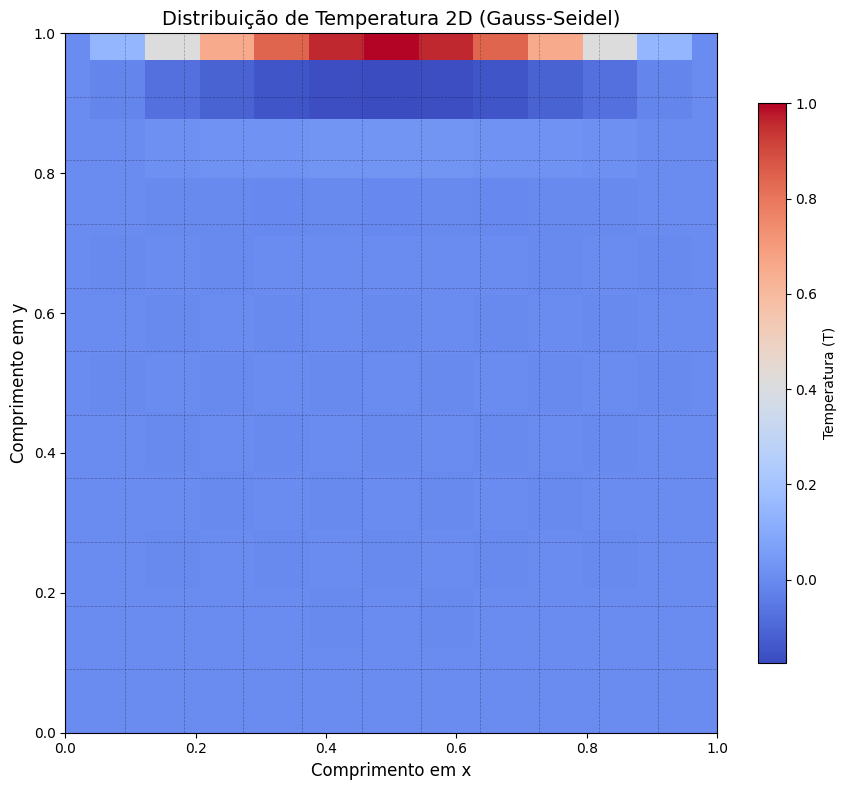

In [117]:
plotar_mapa_calor(Nx, Ny, Lx, Ly, T_solucao)